In [88]:
import pandas as pd
from os import listdir
from datetime import datetime


def read_comsumption_file(group_id):
    file_list = listdir("consumption_power")
    group_no_id_list = [f[:5] for f in file_list]
    consumption_power_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("consumption_power/"+consumption_power_name)

def read_meteo_data_file(group_id):
    file_list = listdir("meteo_data")
    group_no_id_list = [f[-9:-4] for f in file_list]
    meteo_data_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("meteo_data/"+meteo_data_name)


def read_date(datetime_str):
    return datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

def set_dates(df):
    df["datetime"] = [read_date(date) for date in df.timestamp]
    df["date"] = [d.date() for d in df["datetime"]]

def change_scale(df,n,param):
    """plot the parameter data sum on a given time 
    ex : n=48 gives the sum for each day"""
    df[param+"_sum"] = df[param].rolling(n).sum()
    return df[n::n][param+"_sum"].reset_index()[param+"_sum"]

file_list = listdir("consumption_power")
groups_no_prod = pd.read_csv("groups_no_prod.csv")
group_id_0 = groups_no_prod

file_list = listdir("consumption_power")
group_no_id_list = [f[:5] for f in file_list] #remove the first last caracters to keep the group n0

In [89]:
#read data
n0 = 4
group_id_no = str(groups_no_prod.group_id[n0])
consumption_df = read_comsumption_file(group_id_no) 
meteo_df = read_meteo_data_file(group_id_no)

#set dates
set_dates(meteo_df)
set_dates(consumption_df)

In [90]:
print(consumption_df.columns)
print(meteo_df.columns)

Index(['filter_mva', 'filter_mw', 'filtered_manual_int', 'gen', 'net_mw',
       'time_zone_offset', 'timestamp', 'underlying_mw', 'datetime', 'date'],
      dtype='object')
Index(['prate', 'tcdcclm', 'timestamp', 'tmp2m', 'wnd10m_u', 'wnd10m_v',
       'group_id', 'datetime', 'date'],
      dtype='object')


In [91]:
print(meteo_df.sort_values(by ="timestamp").head())
#point each hour

       prate  tcdcclm            timestamp       tmp2m  wnd10m_u  wnd10m_v  \
34338    0.0     66.0  2016-04-01 00:00:00  275.871000     -0.70      4.05   
34278    0.0     68.0  2016-04-01 01:00:00  276.874000     -0.49      5.27   
34035    0.0     79.0  2016-04-01 02:00:00  277.334016     -0.86      5.39   
34282    0.0     84.0  2016-04-01 03:00:00  277.581000     -0.51      5.38   
34300    0.0     88.0  2016-04-01 04:00:00  277.933016     -0.08      5.81   

       group_id            datetime        date  
34338     82024 2016-04-01 00:00:00  2016-04-01  
34278     82024 2016-04-01 01:00:00  2016-04-01  
34035     82024 2016-04-01 02:00:00  2016-04-01  
34282     82024 2016-04-01 03:00:00  2016-04-01  
34300     82024 2016-04-01 04:00:00  2016-04-01  


In [92]:
print(consumption_df.sort_values(by ="timestamp").head())
#point each 1/2 hour

   filter_mva  filter_mw  filtered_manual_int  gen  net_mw  time_zone_offset  \
0         0.0        0.0                  1.0    0  22.651                 1   
1         0.0        0.0                  1.0    0  21.023                 1   
2         0.0        0.0                  1.0    0  19.646                 1   
3         0.0        0.0                  1.0    0  19.126                 1   
4         0.0        0.0                  1.0    0  19.058                 1   

             timestamp  underlying_mw            datetime        date  
0  2016-04-01 00:30:00         22.651 2016-04-01 00:30:00  2016-04-01  
1  2016-04-01 01:00:00         21.023 2016-04-01 01:00:00  2016-04-01  
2  2016-04-01 01:30:00         19.646 2016-04-01 01:30:00  2016-04-01  
3  2016-04-01 02:00:00         19.126 2016-04-01 02:00:00  2016-04-01  
4  2016-04-01 02:30:00         19.058 2016-04-01 02:30:00  2016-04-01  


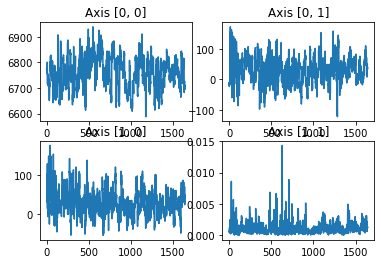

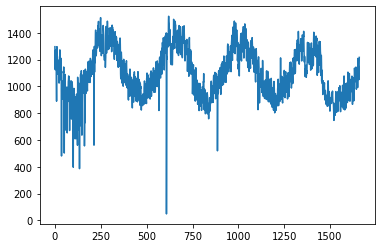

In [95]:
import matplotlib.pyplot as plt
def visu(meteo_df,consumption_df):
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(change_scale(meteo_df,24,"tmp2m"))
    axs[0, 0].set_title('Axis [0, 0]')
    axs[0, 1].plot(change_scale(meteo_df,24,"wnd10m_u"))
    axs[0, 1].set_title('Axis [0, 1]')
    axs[1, 0].plot(change_scale(meteo_df,24,"wnd10m_v"))
    axs[1, 0].set_title('Axis [1, 0]')
    axs[1, 1].plot(change_scale(meteo_df,24,"prate"))
    axs[1, 1].set_title('Axis [1, 1]')
    fig = plt.figure()
    plt.plot( change_scale(consumption_df,48,"underlying_mw"))
visu(meteo_df,consumption_df)

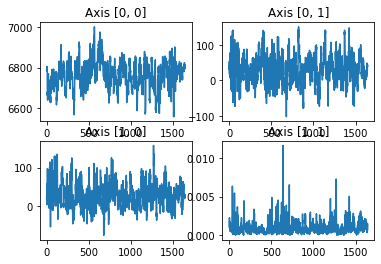

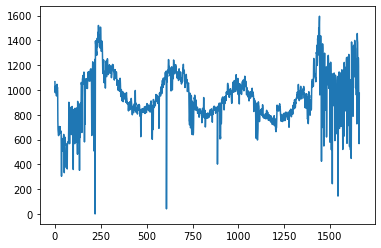

In [97]:
#read data
n0 = 10
group_id_no = str(groups_no_prod.group_id[n0])
consumption_df = read_comsumption_file(group_id_no) 
meteo_df = read_meteo_data_file(group_id_no)

#set dates
set_dates(meteo_df)
set_dates(consumption_df)
visu(meteo_df,consumption_df)

<AxesSubplot:title={'center':'prate/jour'}>

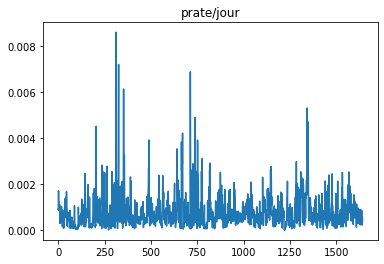

In [55]:
# scaled_df = change_scale(meteo_df,48*30,"wnd10m_u")
scaled_df = change_scale(meteo_df,24,"prate")

scaled_df[:].plot(title = "prate/jour")

# meteo_df.tmp2m[:365].plot()

<AxesSubplot:title={'center':'tmp2m/jour'}>

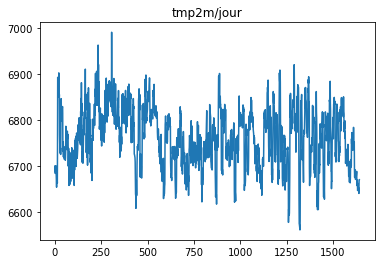

In [56]:
scaled_df = change_scale(meteo_df,24,"tmp2m")
scaled_df[:].plot(title = "tmp2m/jour")

<AxesSubplot:title={'center':'consommation/jour'}>

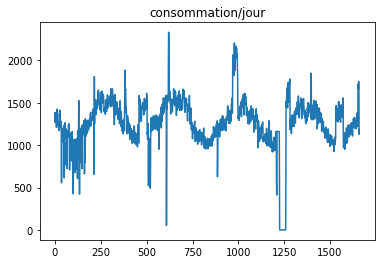

In [57]:
scaled_df = change_scale(consumption_df,48,"underlying_mw")
scaled_df[:].plot(title = "consommation/jour")


In [62]:
meteo_df.columns

Index(['prate', 'tcdcclm', 'timestamp', 'tmp2m', 'wnd10m_u', 'wnd10m_v',
       'group_id', 'datetime', 'prate_sum', 'tmp2m_sum', 'date'],
      dtype='object')

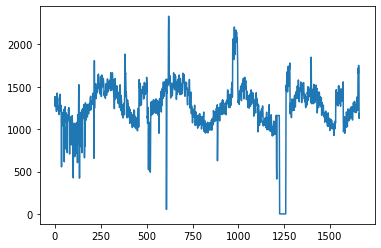

In [61]:
plt.plot(scaled_df)